In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pylab as plt


c:\Python310\cv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train , test = tfds.load("oxford_iiit_pet",split=["train","test"],as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 2/2 [15:48<00:00, 455.61s/ url]

Dl Completed...: 100%|██████████| 2/2 [15:49<00:00, 455.61s/ url]

Dl Completed...: 100%|██████████| 2/2 [15:50<00:00, 455.61s/ url]

Dl Completed...: 100%|██████████| 2/2 [15:51<00:00, 455.61s/ url]

Dl Completed...: 100%|██████████| 2/2 [15:52<00:00, 455.61s/ url]

Dl Completed...: 100%|██████████| 2/2 [15:53<00:00, 455.61s/ url]

Dl Completed...: 100%|██████████| 2/2 [15:54<00:00, 455.61s/ url]

Dl Completed...: 100%|██████████| 2/2 [15:55<00:00, 455.61s/ url]

Dl Completed...: 100%|██████████| 2/2 [15:56<00:00, 455.61s/ url]

Dl Completed...: 100%|██████████| 2/2 [15:57<00:00, 455.61s/ url]

Dl Completed...: 100%|██████████| 2/2 [15:58<00:00, 455.61s/ url]

Dl Completed...: 100%|██████████| 2/2 [15:59<00:00, 455.61s/ url]

Dl Completed...: 100%|██████████| 2/2 [16:00<00:00, 455.61s/ url]

Dl Completed...: 100%|██████████| 2/2 [16:01<00:00, 455.61s/ url]

Dl Completed...: 100%|

Dataset oxford_iiit_pet downloaded and prepared to C:\Users\MSI NEW\tensorflow_datasets\oxford_iiit_pet\3.2.0. Subsequent calls will reuse this data.


In [3]:
base_model = tf.keras.applications.ResNet50(include_top=False, weights="imagenet",input_shape=(224,224,3),pooling="avg")


94765736/94765736 [==============================] - 83s 1us/step


In [5]:
input = tf.keras.layers.Input(shape=(None,None,3), name="input")
resized = tf.keras.layers.Resizing(224,224)(input)
pre_processed = tf.keras.applications.resnet.preprocess_input(resized)

embeddings = base_model(pre_processed)
output = tf.keras.layers.Flatten()(embeddings)
model = tf.keras.Model(inputs=input,outputs=output)

In [6]:
train_ds = train.map(lambda x,y:(tf.expand_dims(x,axis=0),y))
train_ds = train_ds.map(lambda x, y:(model(x),y))

test_ds = test.map(lambda x,y:(tf.expand_dims(x,axis=0),y))
test_ds = test_ds.map(lambda x,y:(model(x),y))

In [7]:
train_x=[]
train_y=[]
for x,y in train_ds:
    train_x.append(x[0])
    train_y.append(y)

In [8]:
test_x=[]
test_y=[]
for x,y in test_ds:
    test_x.append(x[0])
    test_y.append(y)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

classifer = KNeighborsClassifier(n_neighbors=10,weights="distance",algorithm="auto")
classifer.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [10]:
classifer.score(test_x,test_y)

0.8383755791768874

In [11]:
classifer = KNeighborsClassifier(n_neighbors=5,weights="distance",algorithm="auto")
classifer.fit(train_x,train_y)
classifer.score(test_x,test_y)

0.8337421640774053

In [12]:
classifer = KNeighborsClassifier(n_neighbors=5,weights="distance",algorithm="ball_tree")
classifer.fit(train_x,train_y)
classifer.score(test_x,test_y)

0.8337421640774053

In [13]:
classifer = KNeighborsClassifier(n_neighbors=5,weights="distance",algorithm="kd_tree")
classifer.fit(train_x,train_y)
classifer.score(test_x,test_y)

0.8337421640774053

In [14]:
classifer = KNeighborsClassifier(n_neighbors=5,weights="distance",algorithm="brute")
classifer.fit(train_x,train_y)
classifer.score(test_x,test_y)

0.8337421640774053

In [15]:
classifer = KNeighborsClassifier(n_neighbors=50,weights="distance",algorithm="auto")
classifer.fit(train_x,train_y)
classifer.score(test_x,test_y)

0.8443717634232761

In [21]:
classifer = KNeighborsClassifier(n_neighbors=200,weights="distance",algorithm="auto")
classifer.fit(train_x,train_y)
classifer.score(test_x,test_y)

0.8113927500681385

In [25]:
scores = []
for i in range(5, 201):
  classifier = KNeighborsClassifier(n_neighbors=i, weights="distance", algorithm="auto")
  classifier.fit(train_x, train_y)
  score = classifier.score(test_x, test_y)
  scores.append(score)


In [26]:
highest_score = max(scores)
k_with_highest_score = scores.index(highest_score) + 5 

print(highest_score)
print(k_with_highest_score)



0.84518942491142
47


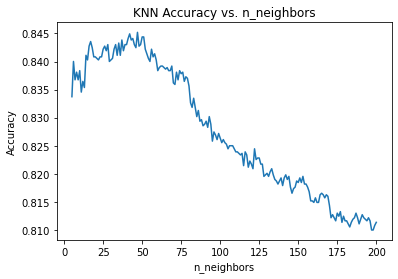

Highest accuracy: 0.8452 at k=47


In [27]:
plt.plot(range(5, 201), scores)
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. n_neighbors")
plt.show()

print(f"Highest accuracy: {highest_score:.4f} at k={k_with_highest_score}")